<h3>import libraries</h3>

In [60]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

<h3>load data</h3>

In [61]:
df = pd.read_csv("toyota.csv")
display(df.head(10))
print(df.shape)
print(df.info())
print(df.columns)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,36.2,2.0
5,GT86,2017,15998,Manual,26919,Petrol,36.2,2.0
6,GT86,2017,18522,Manual,10456,Petrol,36.2,2.0
7,GT86,2017,18995,Manual,12340,Petrol,36.2,2.0
8,GT86,2020,27998,Manual,516,Petrol,33.2,2.0
9,GT86,2016,13990,Manual,37999,Petrol,36.2,2.0


(6738, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   mpg           6738 non-null   float64
 7   engineSize    6738 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 421.2+ KB
None
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')


In [62]:
df['model'].unique()

array([' GT86', ' Corolla', ' RAV4', ' Yaris', ' Auris', ' Aygo', ' C-HR',
       ' Prius', ' Avensis', ' Verso', ' Hilux', ' PROACE VERSO',
       ' Land Cruiser', ' Supra', ' Camry', ' Verso-S', ' IQ',
       ' Urban Cruiser'], dtype=object)

In [63]:
df['fuelType'].unique()

array(['Petrol', 'Other', 'Hybrid', 'Diesel'], dtype=object)

In [64]:
df['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

<h3>label encoding</h3>

In [65]:
##Label encoding

# LE = LabelEncoder()
# df['transmission'] = LE.fit_transform(df['transmission'])
# df['fuelType'] = LE.fit_transform(df['fuelType'])
# df['model'] = LE.fit_transform(df['model'])
# df['year'] = LE.fit_transform(df['year'])

# display(df.head(10))
# print(df.info())

# MAE =  2140.9378949970856
# MSE =  9125162.465129685
# RMSE =  3020.7883846985515
# r_squared=  0.7855741839233796

<h3>one hot encoding</h3>

In [66]:
##one hot encoding

df = pd.get_dummies(df, drop_first=True)
# print(df.info())
display(df.head())

# MAE =  1139.5837471862153
# MSE =  3170377.5266478523
# RMSE =  1780.5553983653112
# r_squared=  0.925501513970822

#Lable encoding MAE > One Hot Encoding MAE, so chose one hot encoding

,year,price,mileage,mpg,engineSize,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,model_ Corolla,...,model_ Urban Cruiser,model_ Verso,model_ Verso-S,model_ Yaris,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2016,16000,24089,36.2,2.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2017,15995,18615,36.2,2.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2015,13998,27469,36.2,2.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2017,18998,14736,36.2,2.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2017,17498,36284,36.2,2.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


<h3>Separating the features and target variable</h3>

In [67]:
target = ['price']

# X = df[features]
X = df.drop('price', axis=1)
y = df[target]

print(X.shape, y.shape)

(6738, 27) (6738, 1)


<h3>Create train and test set</h3>

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5390, 27) (1348, 27) (5390, 1) (1348, 1)


<h3>Training with Linear Regression</h3>

In [69]:
model = LinearRegression()
model = model.fit(X_train, y_train)

<h3>Linear Regression Coefficients and intercept</h3>

In [70]:
coefficients = pd.DataFrame({'features':X.columns, 'coefficients':np.squeeze(model.coef_)})
coefficients = coefficients.sort_values(by='coefficients')
display(coefficients)

,features,coefficients
5,model_ Aygo,-2891.244412
20,model_ Yaris,-1650.043831
21,transmission_Manual,-1067.353769
17,model_ Urban Cruiser,-270.522145
11,model_ IQ,-111.955489
2,mpg,-4.626972
1,mileage,-0.061030
19,model_ Verso-S,138.379859
23,transmission_Semi-Auto,275.051147
0,year,766.989172


In [71]:
model.intercept_

array([-1538333.89239069])

In [72]:
y_pred = model.predict(X_test)

<h3>Prediction Error</h3>

In [73]:
# mean absolute error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE = ", MAE)

# mean squared error
MSE = mean_squared_error(y_test, y_pred)
print("MSE = ", MSE)

# root mean squared error
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE = ", RMSE)

# coefficient of determination
r_squared = r2_score(y_test, y_pred) 
print("r_squared= ", r_squared)

MAE =  1139.5837471862153
MSE =  3170377.5266478523
RMSE =  1780.5553983653112
r_squared=  0.925501513970822


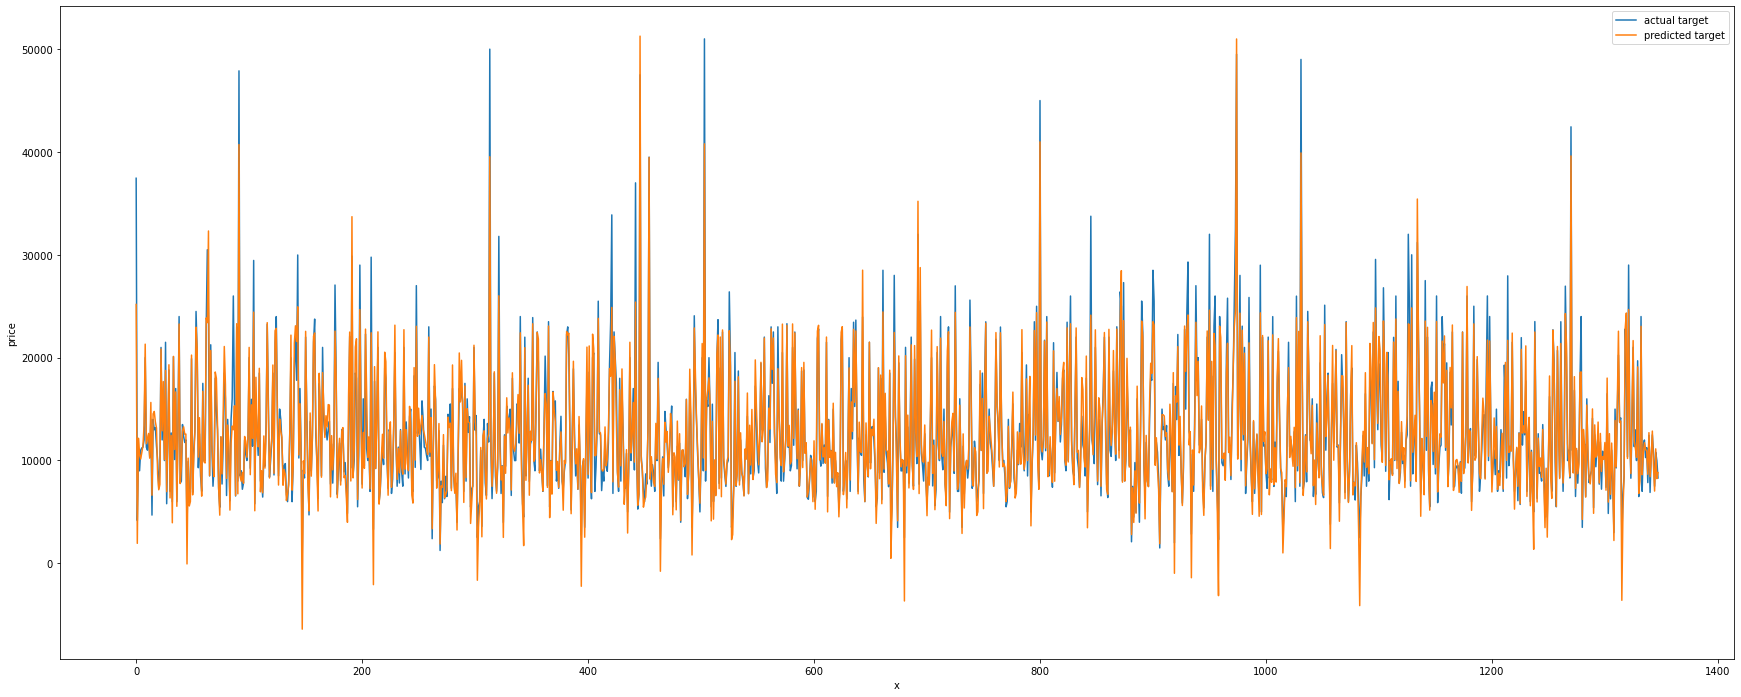

In [74]:
y_test['pred'] = y_pred
y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()

plt.figure(figsize=(30,12))

sns.lineplot(x='x', y='price', data=y_test, label='actual target')
sns.lineplot(x='x', y='pred', data=y_test, label='predicted target')
plt.show()

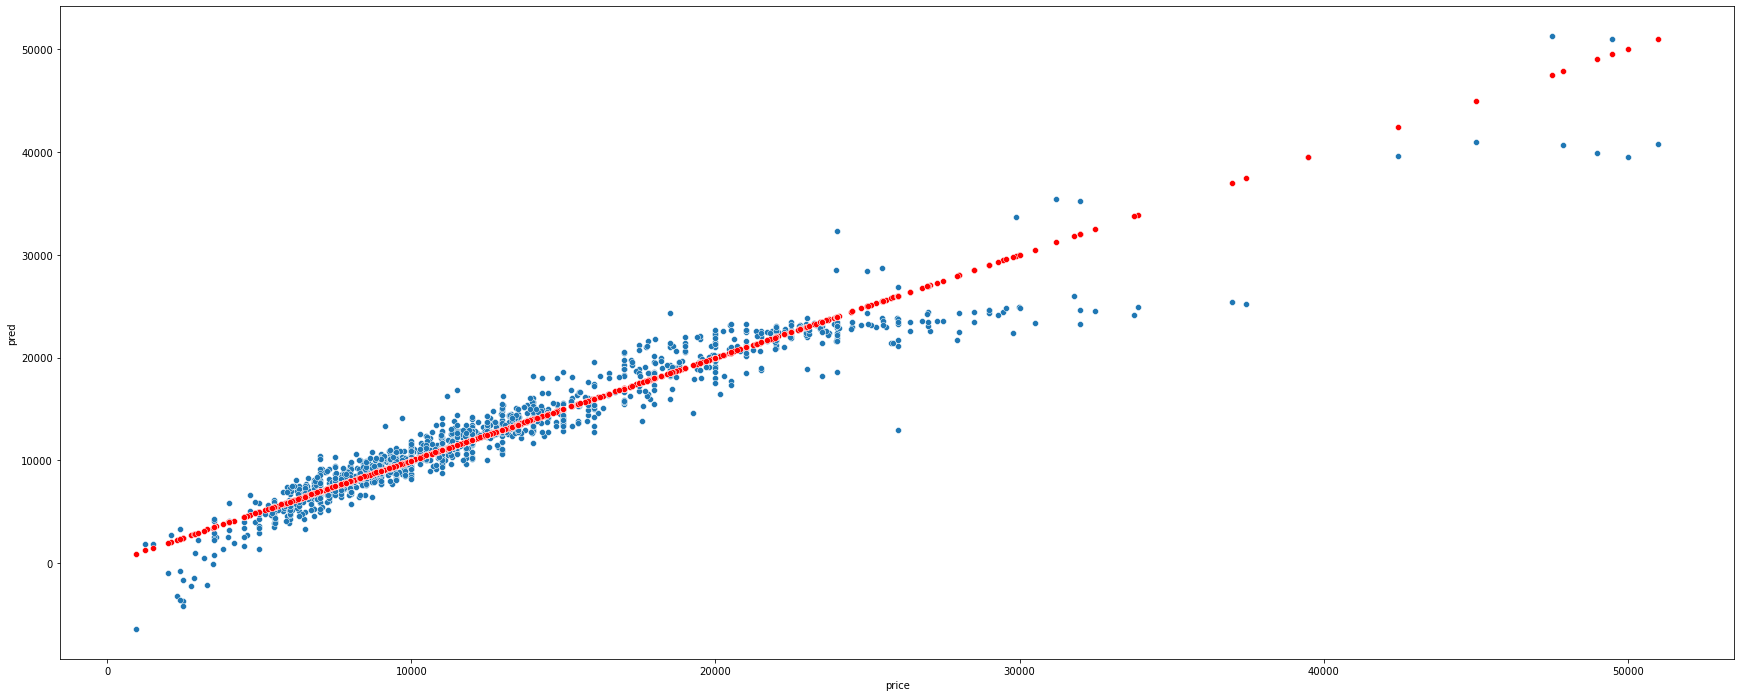

In [75]:

plt.figure(figsize=(30,12))

sns.scatterplot(x='price', y='pred', data=y_test)

sns.scatterplot(x='price', y='price', data=y_test, color='red')
plt.show()
